In [171]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Second dimension of the feature is dim2
feature_dim_2 = 11
dataset_size_model = 10

# Save data to array file first
save_data_to_array(max_len=feature_dim_2, size_dataset=dataset_size_model)

# Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 200
batch_size = 100
verbose = 1
num_classes = 4

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)


Saving vectors of label - 'maconha':   0%|          | 0/10 [00:00<?, ?it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Saving vectors of label - 'cat': 100%|██████████| 10/10 [00:00<00:00, 64.64it/s]

In [175]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]
#     print(model.predict(sample_reshaped))
#     return np.argmax(model.predict(sample_reshaped))

# Building The Model Then Training it

In [173]:
model = get_model()
model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 24 samples, validate on 16 samples
Epoch 1/200
24/24 [==============================] - 3s 116ms/step - loss: 5.0053 - acc: 0.2500 - val_loss: 2.4908 - val_acc: 0.2500
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 2.8082 - acc: 0.2917 - val_loss: 3.9373 - val_acc: 0.2500
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 2.8696 - acc: 0.4583 - val_loss: 1.7041 - val_acc: 0.3750
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 1.9955 - acc: 0.3750 - val_loss: 2.3001 - val_acc: 0.3125
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 2.0444 - acc: 0.4167 - val_loss: 2.2510 - val_acc: 0.4375
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 1.7453 - acc: 0.5417 - val_loss: 2.1383 - val_acc: 0.3750
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 2.1235 - acc: 0.4167 - val_loss: 1.4622 - val_acc: 0.3750
Epoch 8/200
24/24 [==================

Epoch 63/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0423 - acc: 1.0000 - val_loss: 2.0182 - val_acc: 0.5000
Epoch 64/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0916 - acc: 0.9583 - val_loss: 2.2596 - val_acc: 0.5000
Epoch 65/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0639 - acc: 0.9583 - val_loss: 2.2195 - val_acc: 0.5000
Epoch 66/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0799 - acc: 0.9583 - val_loss: 2.1674 - val_acc: 0.5000
Epoch 67/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0144 - acc: 1.0000 - val_loss: 2.1052 - val_acc: 0.5000
Epoch 68/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0221 - acc: 1.0000 - val_loss: 2.1403 - val_acc: 0.5000
Epoch 69/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0351 - acc: 1.0000 - val_loss: 2.2266 - val_acc: 0.5000
Epoch 70/200
24/24 [==============================] - 0s 3ms/step - loss: 0.

Epoch 125/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0558 - acc: 1.0000 - val_loss: 3.3334 - val_acc: 0.4375
Epoch 126/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0096 - acc: 1.0000 - val_loss: 3.2245 - val_acc: 0.4375
Epoch 127/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0341 - acc: 1.0000 - val_loss: 2.9456 - val_acc: 0.5000
Epoch 128/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0105 - acc: 1.0000 - val_loss: 2.8839 - val_acc: 0.5000
Epoch 129/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 2.9275 - val_acc: 0.4375
Epoch 130/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0081 - acc: 1.0000 - val_loss: 2.9566 - val_acc: 0.5000
Epoch 131/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0131 - acc: 1.0000 - val_loss: 2.8362 - val_acc: 0.5000
Epoch 132/200
24/24 [==============================] - 0s 4ms/step - 

Epoch 187/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0171 - acc: 1.0000 - val_loss: 2.2915 - val_acc: 0.5000
Epoch 188/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0626 - acc: 0.9583 - val_loss: 2.6332 - val_acc: 0.3750
Epoch 189/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 2.5954 - val_acc: 0.4375
Epoch 190/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 2.6067 - val_acc: 0.4375
Epoch 191/200
24/24 [==============================] - 0s 3ms/step - loss: 9.7010e-04 - acc: 1.0000 - val_loss: 2.5650 - val_acc: 0.4375
Epoch 192/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 2.6109 - val_acc: 0.4375
Epoch 193/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0295 - acc: 1.0000 - val_loss: 2.8566 - val_acc: 0.4375
Epoch 194/200
24/24 [==============================] - 0s 3ms/ste

## Prediction

In [185]:
# teste audio 
import random

number_audios_classified = {"cat": 0, "happy": 0, "bed": 0, "maconha": 0}
count_audios_with_term = 0

files_dir = os.listdir('./teste_audio')

random.shuffle(files_dir)

for audio in files_dir:
    prediction = predict('./teste_audio/' + audio, model=model)
    number_audios_classified[prediction] += 1
    print('audio: ' + audio + ' é classificado como: ' + prediction)
    count_audios_with_term += 1


audio: Clipe 255 é classificado como: maconha
audio: Clipe 259 é classificado como: maconha
audio: Clipe 254 é classificado como: maconha
audio: Clipe 258 é classificado como: maconha
audio: Clipe 264 é classificado como: cat
audio: Clipe 263 é classificado como: maconha
audio: Clipe 261 é classificado como: happy
audio: Clipe 262 é classificado como: maconha
audio: Clipe 260 é classificado como: maconha
audio: Clipe 257 é classificado como: maconha


In [186]:
import numpy as np

sum_false_negative = np.sum([number_audios_classified[i] for i in number_audios_classified if i is not 'maconha']) 
print('Número de falso negativos: ' + str(sum_false_negative))
print('Total de audios: %d'%(count_audios_with_term))
percentage_false_negative = (sum_false_negative / count_audios_with_term) * 100
print('Taxa de falso negativo: ' + str(percentage_false_negative) + '%')


Número de falso negativos: 2
Total de audios: 10
Taxa de falso negativo: 20.0%


In [178]:
import os

number_audios_classified_2 = {"cat": 0, "happy": 0, "bed": 0, "maconha": 0}
count_audios_no_term = 0 

# files from directorie whatsapp
files_dir = os.listdir('/home/captain-rogers/Área de Trabalho/whatsapp/audios')

for audio in files_dir:
    concat_audio_path = '/home/captain-rogers/Área de Trabalho/whatsapp/audios/' + audio 
    
    prediction = predict(concat_audio_path, model=model)
    
    number_audios_classified_2[prediction] += 1 
    
    print('audio: ' + audio + ' é classificado como: ' + prediction)
    count_audios_no_term += 1
    
print(number_audios_classified_2)

audio: PTT-20181109-WA0125.opus é classificado como: cat
audio: PTT-20180926-WA0087.opus é classificado como: maconha
audio: PTT-20181026-WA0113.opus é classificado como: maconha
audio: PTT-20181030-WA0099.opus é classificado como: bed
audio: PTT-20181109-WA0072.opus é classificado como: maconha
audio: PTT-20181021-WA0028.opus é classificado como: maconha
audio: PTT-20181109-WA0021.opus é classificado como: bed
audio: PTT-20181101-WA0006.opus é classificado como: cat
audio: PTT-20180929-WA0012.opus é classificado como: maconha
audio: PTT-20180907-WA0005.opus é classificado como: cat
audio: PTT-20181109-WA0016.opus é classificado como: bed
audio: PTT-20181101-WA0171.opus é classificado como: cat
audio: PTT-20181109-WA0144.opus é classificado como: bed
audio: PTT-20181105-WA0037.opus é classificado como: cat
audio: PTT-20181024-WA0065.opus é classificado como: maconha
audio: PTT-20181026-WA0114.opus é classificado como: happy
audio: PTT-20181009-WA0172.opus é classificado como: bed
audio

audio: PTT-20181109-WA0083.opus é classificado como: happy
audio: PTT-20181006-WA0035.opus é classificado como: happy
audio: PTT-20180913-WA0049.opus é classificado como: cat
audio: PTT-20181030-WA0105.opus é classificado como: cat
audio: PTT-20181101-WA0120.opus é classificado como: cat
audio: PTT-20181029-WA0025.opus é classificado como: cat
audio: PTT-20181109-WA0073.opus é classificado como: maconha
audio: PTT-20181009-WA0173.opus é classificado como: cat
audio: PTT-20181102-WA0115.opus é classificado como: happy
audio: PTT-20181019-WA0048.opus é classificado como: maconha
audio: PTT-20181108-WA0011.opus é classificado como: happy
audio: PTT-20180908-WA0071.opus é classificado como: bed
audio: PTT-20180911-WA0054.opus é classificado como: happy
audio: PTT-20181026-WA0131.opus é classificado como: cat
audio: PTT-20180927-WA0006.opus é classificado como: cat
audio: PTT-20181101-WA0140.opus é classificado como: bed
audio: PTT-20180908-WA0073.opus é classificado como: cat
audio: PTT-20

audio: PTT-20181027-WA0112.opus é classificado como: bed
audio: PTT-20181109-WA0041.opus é classificado como: happy
audio: PTT-20181028-WA0103.opus é classificado como: bed
audio: PTT-20181002-WA0018.opus é classificado como: happy
audio: PTT-20181105-WA0149.opus é classificado como: bed
audio: PTT-20181103-WA0099.opus é classificado como: bed
audio: PTT-20180912-WA0068.opus é classificado como: happy
audio: PTT-20180930-WA0028.opus é classificado como: cat
audio: PTT-20181109-WA0133.opus é classificado como: cat
audio: PTT-20181109-WA0020.opus é classificado como: cat
audio: PTT-20180918-WA0060.opus é classificado como: bed
audio: PTT-20181109-WA0207.opus é classificado como: bed
audio: PTT-20181105-WA0161.opus é classificado como: cat
audio: PTT-20181105-WA0163.opus é classificado como: bed
audio: PTT-20180913-WA0053.opus é classificado como: happy
audio: PTT-20181101-WA0025.opus é classificado como: happy
audio: PTT-20181107-WA0117.opus é classificado como: cat
audio: PTT-20181109-W

audio: PTT-20181104-WA0101.opus é classificado como: bed
audio: PTT-20181105-WA0059.opus é classificado como: bed
audio: PTT-20180927-WA0088.opus é classificado como: cat
audio: PTT-20181105-WA0113.opus é classificado como: cat
audio: PTT-20181102-WA0009.opus é classificado como: cat
audio: PTT-20181102-WA0166.opus é classificado como: happy
audio: PTT-20181108-WA0060.opus é classificado como: bed
audio: PTT-20181109-WA0087.opus é classificado como: bed
audio: PTT-20181028-WA0098.opus é classificado como: bed
audio: PTT-20181107-WA0044.opus é classificado como: cat
audio: PTT-20181105-WA0156.opus é classificado como: cat
audio: PTT-20181102-WA0003.opus é classificado como: cat
audio: PTT-20181103-WA0056.opus é classificado como: bed
audio: PTT-20181013-WA0025.opus é classificado como: bed
audio: PTT-20181101-WA0150.opus é classificado como: bed
audio: PTT-20181008-WA0075.opus é classificado como: bed
audio: PTT-20180918-WA0041.opus é classificado como: cat
audio: PTT-20181012-WA0070.op

audio: PTT-20180913-WA0044.opus é classificado como: cat
audio: PTT-20181102-WA0097.opus é classificado como: cat
audio: PTT-20181013-WA0012.opus é classificado como: cat
audio: PTT-20181109-WA0162.opus é classificado como: bed
audio: PTT-20181101-WA0127.opus é classificado como: cat
audio: PTT-20180912-WA0093.opus é classificado como: happy
audio: PTT-20181102-WA0092.opus é classificado como: bed
audio: PTT-20181109-WA0028.opus é classificado como: cat
audio: PTT-20181109-WA0084.opus é classificado como: maconha
audio: PTT-20181106-WA0012.opus é classificado como: cat
audio: PTT-20181102-WA0206.opus é classificado como: bed
audio: PTT-20181109-WA0155.opus é classificado como: bed
audio: PTT-20181101-WA0172.opus é classificado como: maconha
audio: PTT-20181026-WA0133.opus é classificado como: bed
audio: PTT-20181102-WA0103.opus é classificado como: cat
audio: PTT-20181029-WA0071.opus é classificado como: happy
audio: PTT-20181104-WA0098.opus é classificado como: bed
audio: PTT-20181001

audio: PTT-20181102-WA0007.opus é classificado como: bed
audio: PTT-20181109-WA0043.opus é classificado como: cat
audio: PTT-20181106-WA0025.opus é classificado como: cat
audio: PTT-20181102-WA0118.opus é classificado como: bed
audio: PTT-20181109-WA0019.opus é classificado como: maconha
audio: PTT-20181102-WA0091.opus é classificado como: cat
audio: PTT-20181008-WA0076.opus é classificado como: cat
audio: PTT-20181009-WA0156.opus é classificado como: bed
audio: PTT-20181109-WA0149.opus é classificado como: bed
audio: PTT-20181007-WA0031.opus é classificado como: happy
audio: PTT-20181101-WA0153.opus é classificado como: happy
audio: PTT-20181109-WA0096.opus é classificado como: bed
audio: PTT-20181109-WA0126.opus é classificado como: happy
audio: PTT-20181102-WA0138.opus é classificado como: bed
audio: PTT-20181109-WA0103.opus é classificado como: cat
audio: PTT-20181102-WA0074.opus é classificado como: bed
audio: PTT-20181107-WA0041.opus é classificado como: maconha
audio: PTT-201809

audio: PTT-20181026-WA0094.opus é classificado como: happy
audio: PTT-20181003-WA0025.opus é classificado como: cat
audio: PTT-20180927-WA0015.opus é classificado como: cat
audio: PTT-20181102-WA0193.opus é classificado como: bed
audio: PTT-20181010-WA0049.opus é classificado como: bed
audio: PTT-20181101-WA0076.opus é classificado como: cat
audio: PTT-20181011-WA0102.opus é classificado como: bed
audio: PTT-20180927-WA0000.opus é classificado como: bed
audio: PTT-20181101-WA0149.opus é classificado como: cat
audio: PTT-20181030-WA0095.opus é classificado como: bed
audio: PTT-20180929-WA0004.opus é classificado como: maconha
audio: PTT-20180925-WA0003.opus é classificado como: cat
audio: PTT-20180913-WA0077.opus é classificado como: bed
audio: PTT-20181101-WA0103.opus é classificado como: cat
audio: PTT-20180915-WA0058.opus é classificado como: cat
{'cat': 360, 'happy': 155, 'bed': 249, 'maconha': 103}


In [180]:
print('Número de falsos positivos: ' + str(number_audios_classified_2['maconha']))
print('Total de audios: %d'%(count_audios_no_term))
percentage_false_positive = (number_audios_classified_2['maconha'] / count_audios_no_term) * 100
print('Taxa de falso positivo: %.2f%%'%(percentage_false_positive))

Número de falsos positivos: 103
Total de audios: 867
Taxa de falso positivo: 11.88%


In [ ]:
teste = predict('./teste4', model=model)

print(teste)

##  Audio with expression "maconha" inside represent in waveplot and spectogram image 

Populating the interactive namespace from numpy and matplotlib


/home/captain-rogers/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


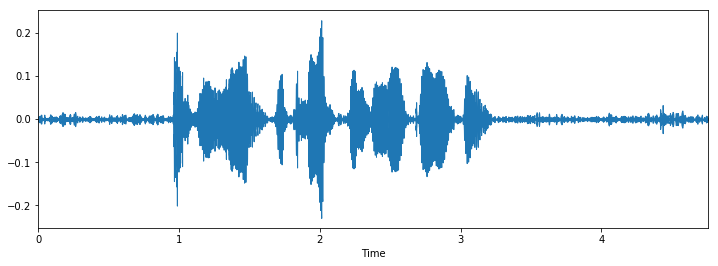

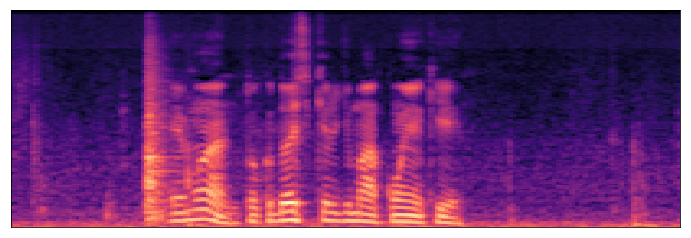

In [181]:
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob

# Audio with expression "maconha" inside with another terms
data, sampling_rate = librosa.load('./teste4')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(S_dB, sr=sampling_rate)


## Unique "maconha" expression audio in waveplot and spectogram image 

In [ ]:
# an audio with an expression unique "maconha"
data, sampling_rate = librosa.load('./data/maconha/maconha-0a5388ecab714fab84f39b6948270fbe.wav')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(S_dB, sr=sampling_rate)

# Análise de bechmark

In [183]:
# save the information about statistic in csv to show in table

import pandas as pd

data = pd.DataFrame({
                     "Qtd dataset": [], 
                     "Falso positivo": [],
                     "Falso negativo": [],
                     "Porcentagem FP": [],
                     "Porcentagem FN": []
                    })

try:
    data = pd.read_csv('save.csv', sep = ',')
except FileNotFoundError:
    with open('save.csv', 'w'):
        data.to_csv('save.csv', index=False)
        print(data)
except pd.errors.EmptyDataError:
    data.to_csv('save.csv', index=False)
    print(data)
        
data_add = pd.DataFrame({
    "Qtd dataset": [dataset_size_model], 
    "Falso positivo": [number_audios_classified_2['maconha']],
    "Falso negativo": [sum_false_negative],
    "Porcentagem FP": [percentage_false_positive],
    "Porcentagem FN": [percentage_false_negative]
})

print(data)

data = data.append(data_add)
open("save.csv", "w").close()
data.to_csv('save.csv', index=False)

Empty DataFrame
Columns: [Qtd dataset, Falso positivo, Falso negativo, Porcentagem FP, Porcentagem FN]
Index: []


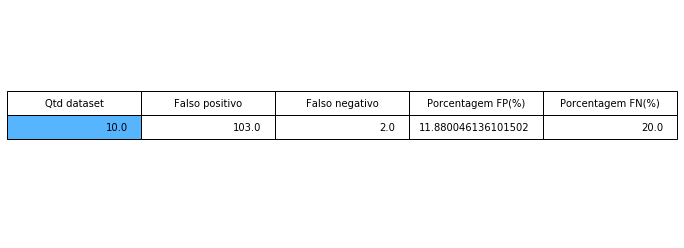

In [184]:
import matplotlib.pyplot as plt
import  pandas as pd

data = pd.read_csv('save.csv')
cell_text = data.values.tolist()

# Prepare table
columns = (
    'Qtd dataset',
    'Falso positivo', 
    'Falso negativo', 
    'Porcentagem FP(%)', 
    'Porcentagem FN(%)'
)

# Add a table at the bottom of the axes
colors = [["#56b5fd","w","w","w","w"]]

for i in range( len(cell_text) - 1 ):
    colors.append(["#56b5fd","w","w","w","w"])
    
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=cell_text,cellColours=colors,
                    colWidths=[.4]*5, colLabels=columns,loc='center')

the_table.set_fontsize(20)
the_table.scale(1, 2)

plt.show()